In [9]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Base path to image folders
base_dir = r"C:\Users\Tom\Downloads\archive\NEU-DET\train\images"
categories = ["scratches", "rolled-in_scale", "pitted_surface", "patches", "inclusion", "crazing"]

images = []
labels = []

print("🔍 Starting to load JPG images...")

for label in categories:
    folder_path = os.path.join(base_dir, label)
    print(f"📂 Loading from: {folder_path}")

    for file in os.listdir(folder_path):
        if file.lower().endswith(".jpg"):
            file_path = os.path.join(folder_path, file)
            try:
                # Load image in grayscale
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

                # Resize to 64x64
                img_resized = cv2.resize(img, (64, 64))

                images.append(img_resized)
                labels.append(label)

            except Exception as e:
                print(f"⚠️ Error loading {file_path}: {e}")

# Convert to numpy arrays
X = np.array(images).astype("float32") / 255.0
X = X.reshape(-1, 64, 64, 1)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Confirm everything loaded
print(f"\n✅ Total images loaded: {len(X)}")
print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")
print(f"✅ Classes: {le.classes_}")


🔍 Starting to load JPG images...
📂 Loading from: C:\Users\Tom\Downloads\archive\NEU-DET\train\images\scratches
📂 Loading from: C:\Users\Tom\Downloads\archive\NEU-DET\train\images\rolled-in_scale
📂 Loading from: C:\Users\Tom\Downloads\archive\NEU-DET\train\images\pitted_surface
📂 Loading from: C:\Users\Tom\Downloads\archive\NEU-DET\train\images\patches
📂 Loading from: C:\Users\Tom\Downloads\archive\NEU-DET\train\images\inclusion
📂 Loading from: C:\Users\Tom\Downloads\archive\NEU-DET\train\images\crazing

✅ Total images loaded: 1440
✅ X shape: (1440, 64, 64, 1)
✅ y shape: (1440,)
✅ Classes: ['crazing' 'inclusion' 'patches' 'pitted_surface' 'rolled-in_scale'
 'scratches']


In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. One-hot encode the labels
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# 3. Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test_cat)
)


Epoch 1/10


C:\Users\Tom\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.1949 - loss: 1.7509 - val_accuracy: 0.3681 - val_loss: 1.3652
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4560 - loss: 1.2206 - val_accuracy: 0.4097 - val_loss: 1.1556
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5749 - loss: 1.0181 - val_accuracy: 0.7465 - val_loss: 0.7429
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8296 - loss: 0.6076 - val_accuracy: 0.7292 - val_loss: 0.6312
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8028 - loss: 0.5607 - val_accuracy: 0.7708 - val_loss: 0.5673
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8772 - loss: 0.4147 - val_accuracy: 0.8264 - val_loss: 0.5012
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8903 - loss: 0.3796 - val_accuracy: 0.8681 - val_loss: 0.3416
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9148 - loss: 0.2876 - val_accuracy: 0.9028 - val_loss: 0.

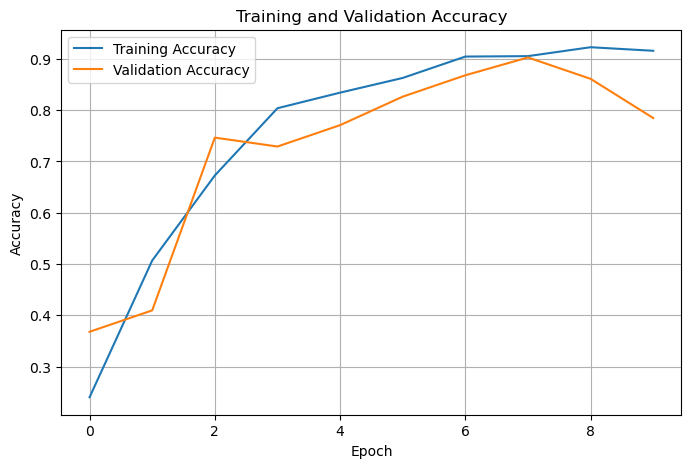

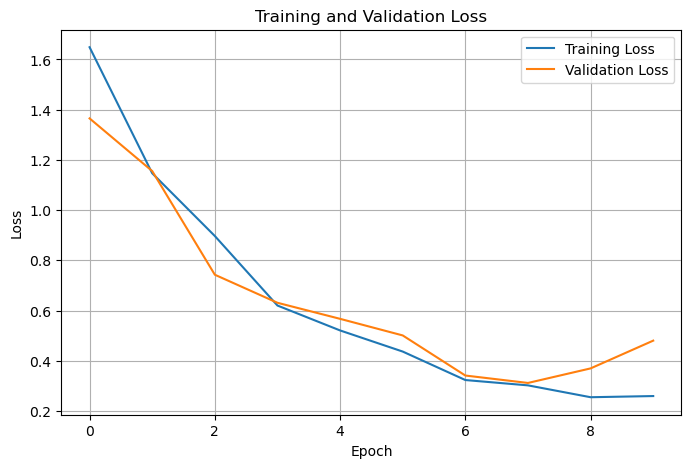

In [11]:
# Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
 Classification Report:

                 precision    recall  f1-score   support

        crazing       1.00      0.77      0.87        48
      inclusion       0.59      0.96      0.73        48
        patches       0.96      0.96      0.96        48
 pitted_surface       0.67      0.73      0.70        48
rolled-in_scale       0.83      0.60      0.70        48
      scratches       0.87      0.69      0.77        48

       accuracy                           0.78       288
      macro avg       0.82      0.78      0.79       288
   weighted avg       0.82      0.78      0.79       288



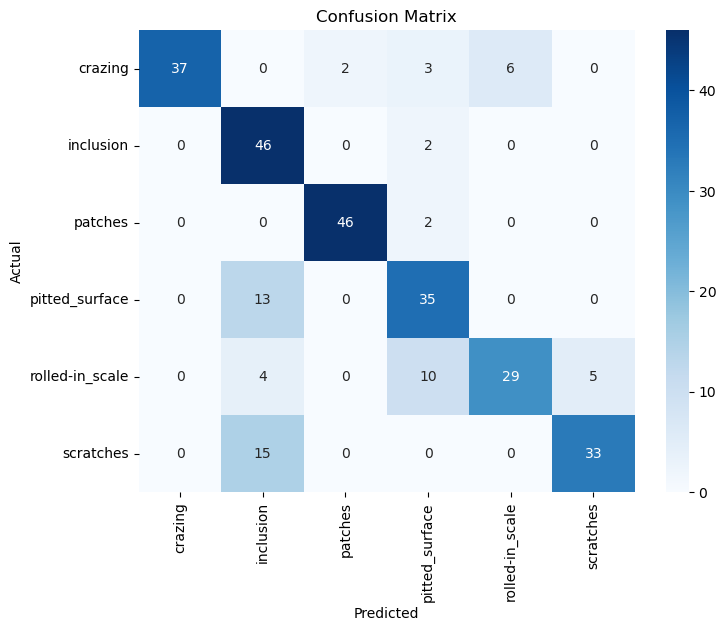

In [13]:
# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(" Classification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
